In [ ]:
# Instalar bibliotecas necessárias
!pip install networkx matplotlib --quiet

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

# Suba seu CSV no Colab ou carregue diretamente
# Exemplo:

df = pd.read_csv('key.csv')




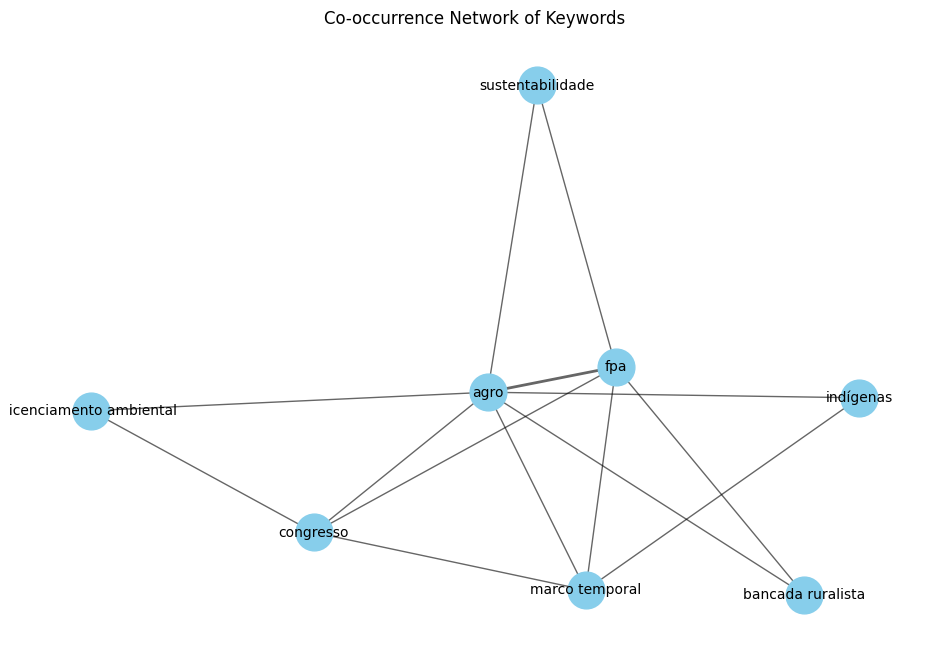

In [ ]:
# Exemplo de DataFrame

df = pd.DataFrame(data)

###1o processamento

# Função para extrair pares de coocorrência
pair_counter = Counter()
for keywords in df['keywords']:
    tags = [kw.strip().lower() for kw in keywords.split(',')]
    pairs = combinations(sorted(set(tags)), 2)
    pair_counter.update(pairs)

# Criar grafo
G = nx.Graph()
for (tag1, tag2), weight in pair_counter.items():
    G.add_edge(tag1, tag2, weight=weight)

# Desenhar grafo
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5)
edges = G.edges()
weights = [G[u][v]['weight'] for u, v in edges]

nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue')
nx.draw_networkx_edges(G, pos, width=weights, alpha=0.6)
nx.draw_networkx_labels(G, pos, font_size=10)

plt.title("Co-occurrence Network of Keywords")
plt.axis('off')
plt.show()


plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, k=0.5, seed=42)
weights = [G[u][v]['weight'] for u, v in G.edges()]

nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, alpha=0.9)
nx.draw_networkx_edges(G, pos, width=weights, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=9)

plt.title("Keyword Co-occurrence Network — Highlight: Marco Temporal")
plt.axis('off')
plt.show()

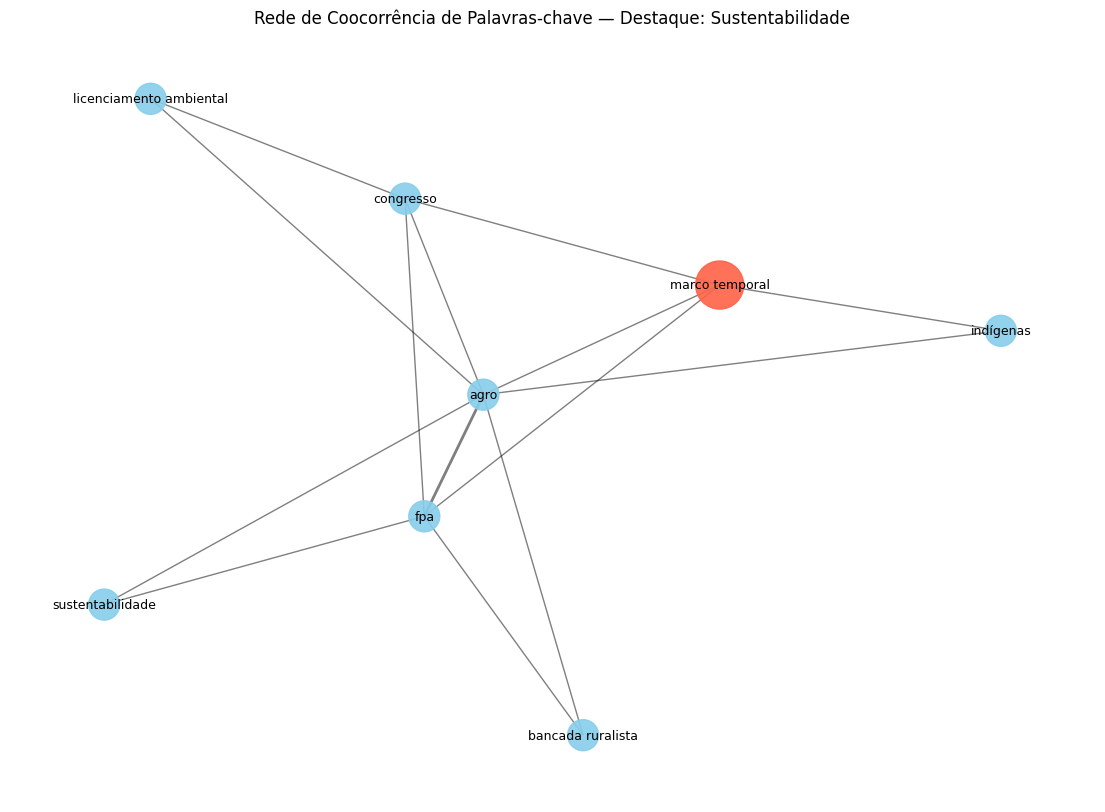

In [ ]:
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, k=0.5, seed=42)
weights = [G[u][v]['weight'] for u, v in G.edges()]

nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, alpha=0.9)
nx.draw_networkx_edges(G, pos, width=weights, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=9)

plt.title("Rede de Coocorrência de Palavras-chave — Destaque: Sustentabilidade")
plt.axis('off')
plt.show()

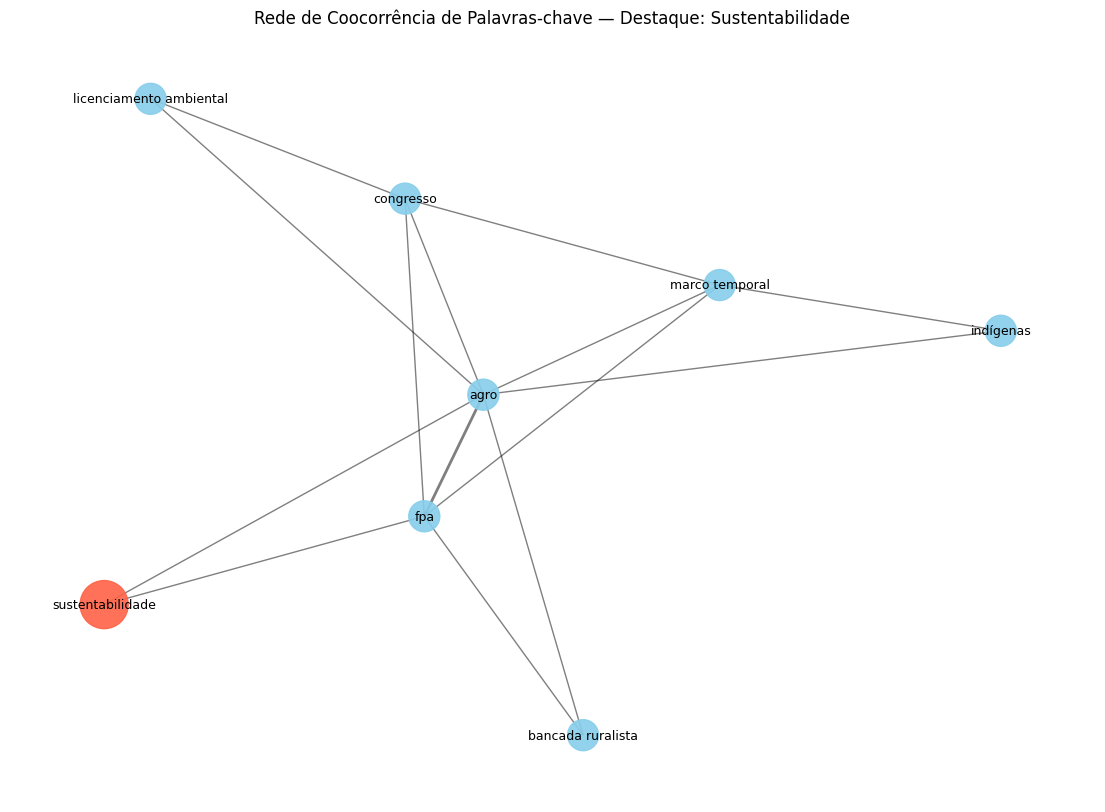

In [ ]:
# Definir tamanho e cor dos nós, destacando "sustentabilidade"
node_sizes = []
node_colors = []
for node in G.nodes():
    if node == "sustentabilidade":
        node_sizes.append(1200)       # destaque maior
        node_colors.append('tomato')  # destaque em vermelho
    else:
        node_sizes.append(500)
        node_colors.append('skyblue')

# Plotar o grafo com destaque
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, k=0.5, seed=42)
weights = [G[u][v]['weight'] for u, v in G.edges()]

nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, alpha=0.9)
nx.draw_networkx_edges(G, pos, width=weights, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=9)

plt.title("Rede de Coocorrência de Palavras-chave — Destaque: Sustentabilidade")
plt.axis('off')
plt.show()


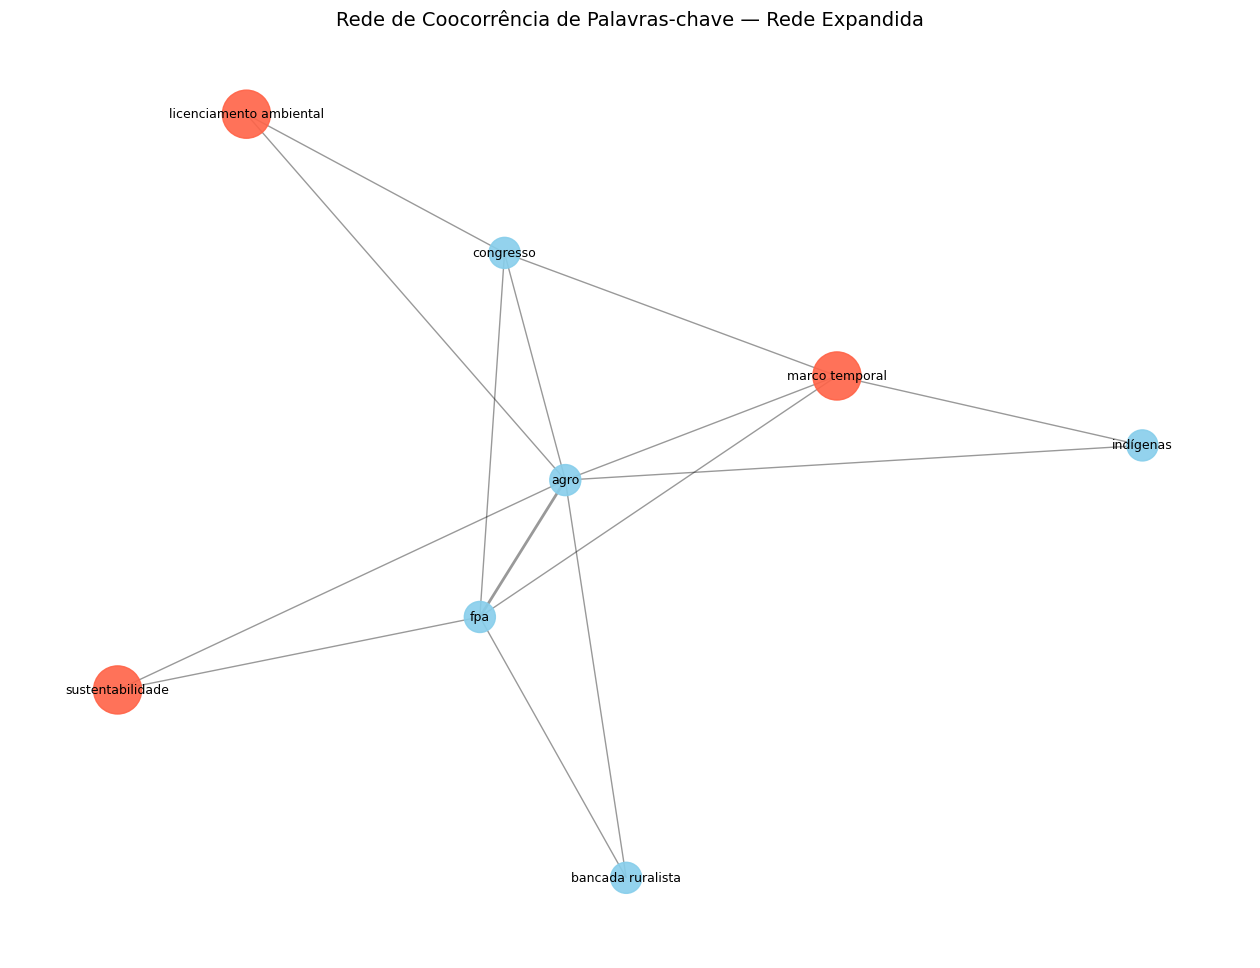

In [ ]:
from collections import Counter
from itertools import combinations
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Contar pares de palavras (coocorrência)
pair_counter = Counter()
for keywords in df['keywords']:
    tags = [kw.strip().lower() for kw in keywords.split(',') if kw.strip()]
    pairs = combinations(sorted(set(tags)), 2)
    pair_counter.update(pairs)

# Criar grafo
G = nx.Graph()
for (tag1, tag2), weight in pair_counter.items():
    if weight >= 1:  # Mostra tudo com pelo menos 1 ocorrência
        G.add_edge(tag1, tag2, weight=weight)



# Visualizar
plt.figure(figsize=(16, 12))
pos = nx.spring_layout(G, k=0.6, seed=42)
weights = [G[u][v]['weight'] for u, v in G.edges()]

nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, alpha=0.9)
nx.draw_networkx_edges(G, pos, width=weights, alpha=0.4)
nx.draw_networkx_labels(G, pos, font_size=9)

plt.title("Rede de Coocorrência de Palavras-chave — Rede Expandida", fontsize=14)
plt.axis('off')
plt.show()


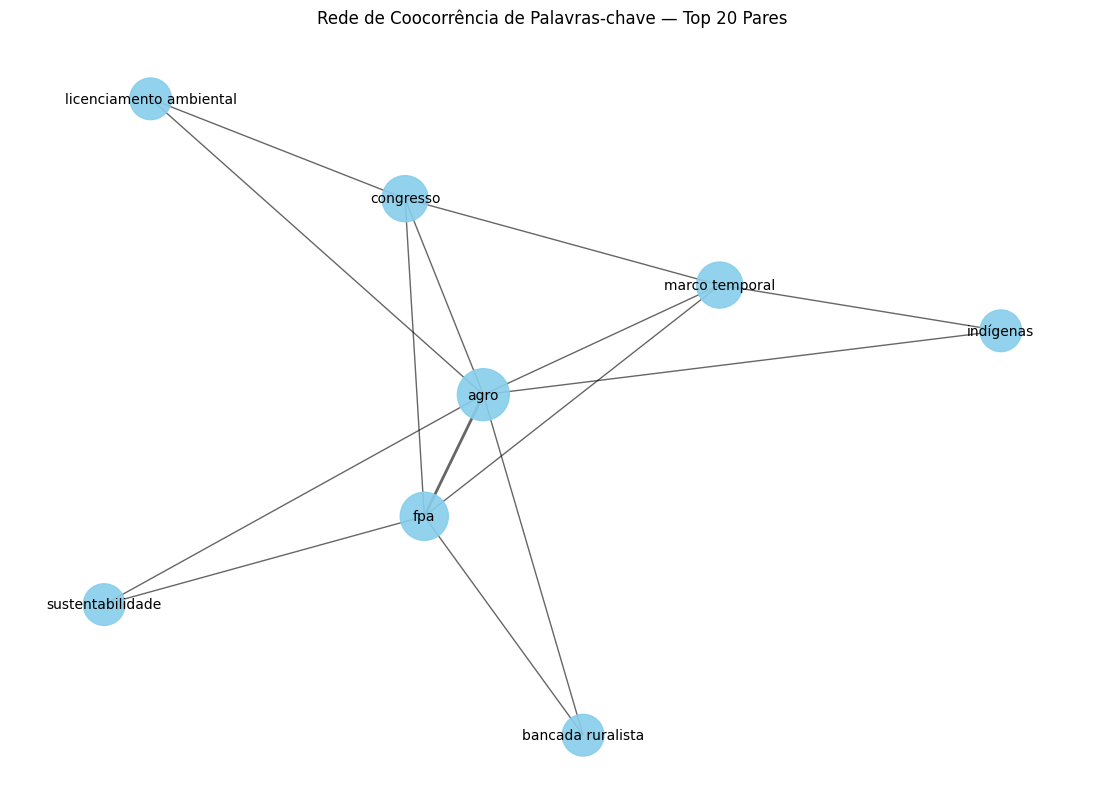

In [ ]:
# Instalar bibliotecas (caso necessário)
# !pip install matplotlib networkx pandas

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter
import re


# Limpar e processar os dados
pair_counter = Counter()
for keywords in df['keywords']:
    tags = [re.sub(r'\s+', ' ', kw.strip().lower()) for kw in str(keywords).split(',')]
    pairs = combinations(sorted(set(tags)), 2)
    pair_counter.update(pairs)

# Selecionar os 20 pares mais frequentes
top_pairs = pair_counter.most_common(40)

# Criar o grafo
G = nx.Graph()
for (tag1, tag2), weight in top_pairs:
    G.add_edge(tag1, tag2, weight=weight)

# Visualizar o grafo
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, k=0.5, seed=42)
weights = [G[u][v]['weight'] for u, v in G.edges()]
node_sizes = [700 + 100 * G.degree(n) for n in G.nodes()]

nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='skyblue', alpha=0.9)
nx.draw_networkx_edges(G, pos, width=weights, alpha=0.6)
nx.draw_networkx_labels(G, pos, font_size=10)

plt.title("Rede de Coocorrência de Palavras-chave — Top 20 Pares")
plt.axis('off')
plt.show()


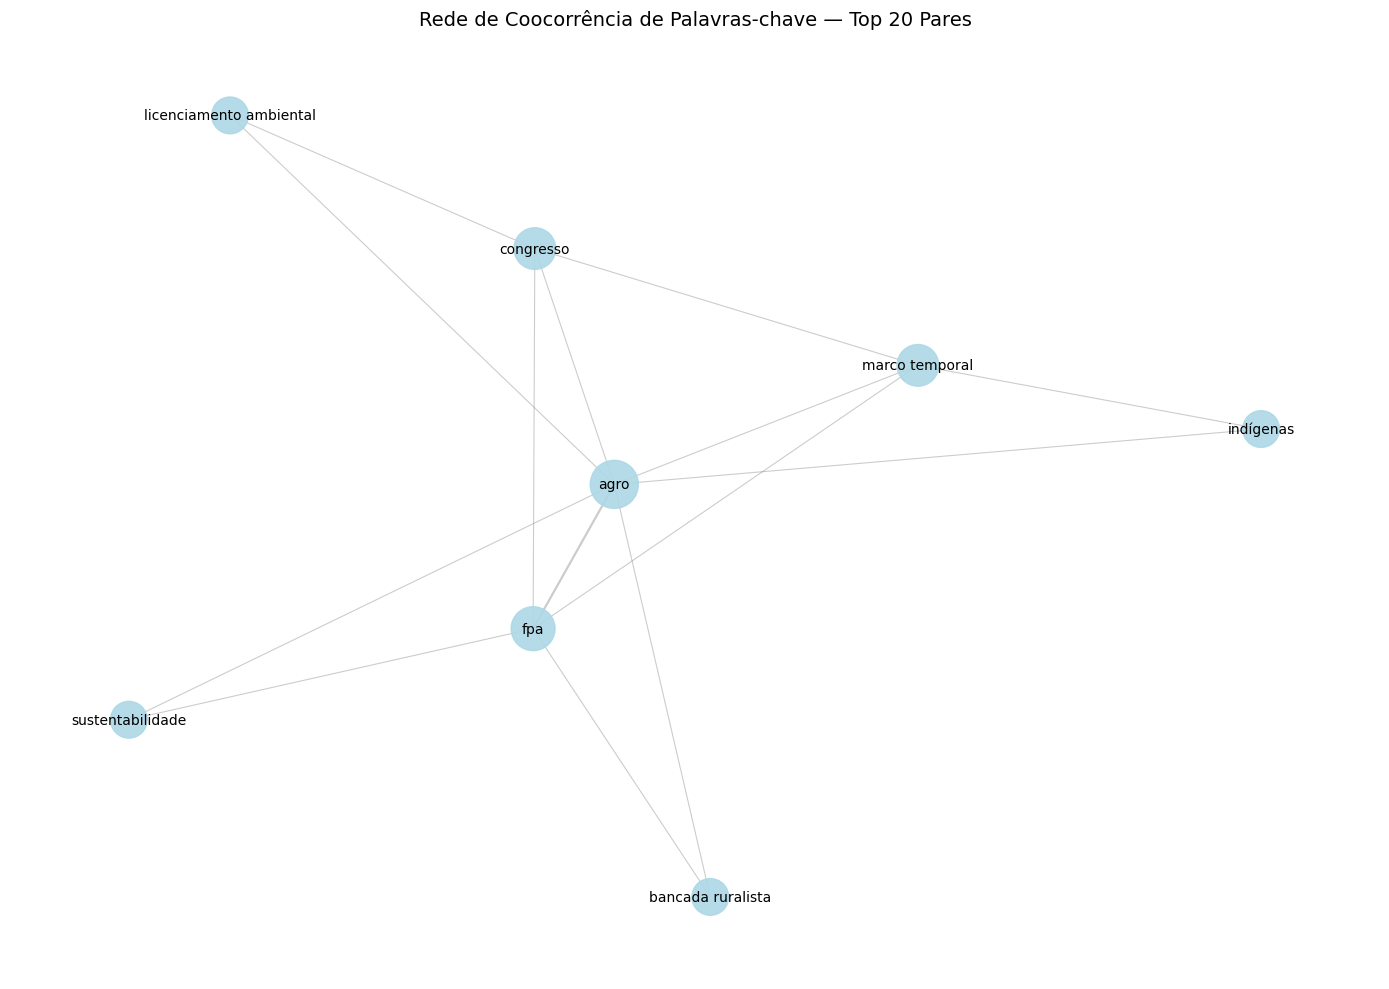

In [ ]:
# Visualização com layout mais clean
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, k=0.7, seed=42)

# Suavizar espessura das arestas para melhor visualização
weights = [G[u][v]['weight'] for u, v in G.edges()]
scaled_weights = [w * 0.8 for w in weights]

# Suavizar tamanho dos nós
node_sizes = [500 + 100 * G.degree(n) for n in G.nodes()]

# Desenhar grafo
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='lightblue', alpha=0.9)
nx.draw_networkx_edges(G, pos, width=scaled_weights, edge_color='gray', alpha=0.4)
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')

# Título e ocultar eixo
plt.title("Rede de Coocorrência de Palavras-chave — Top 20 Pares", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()


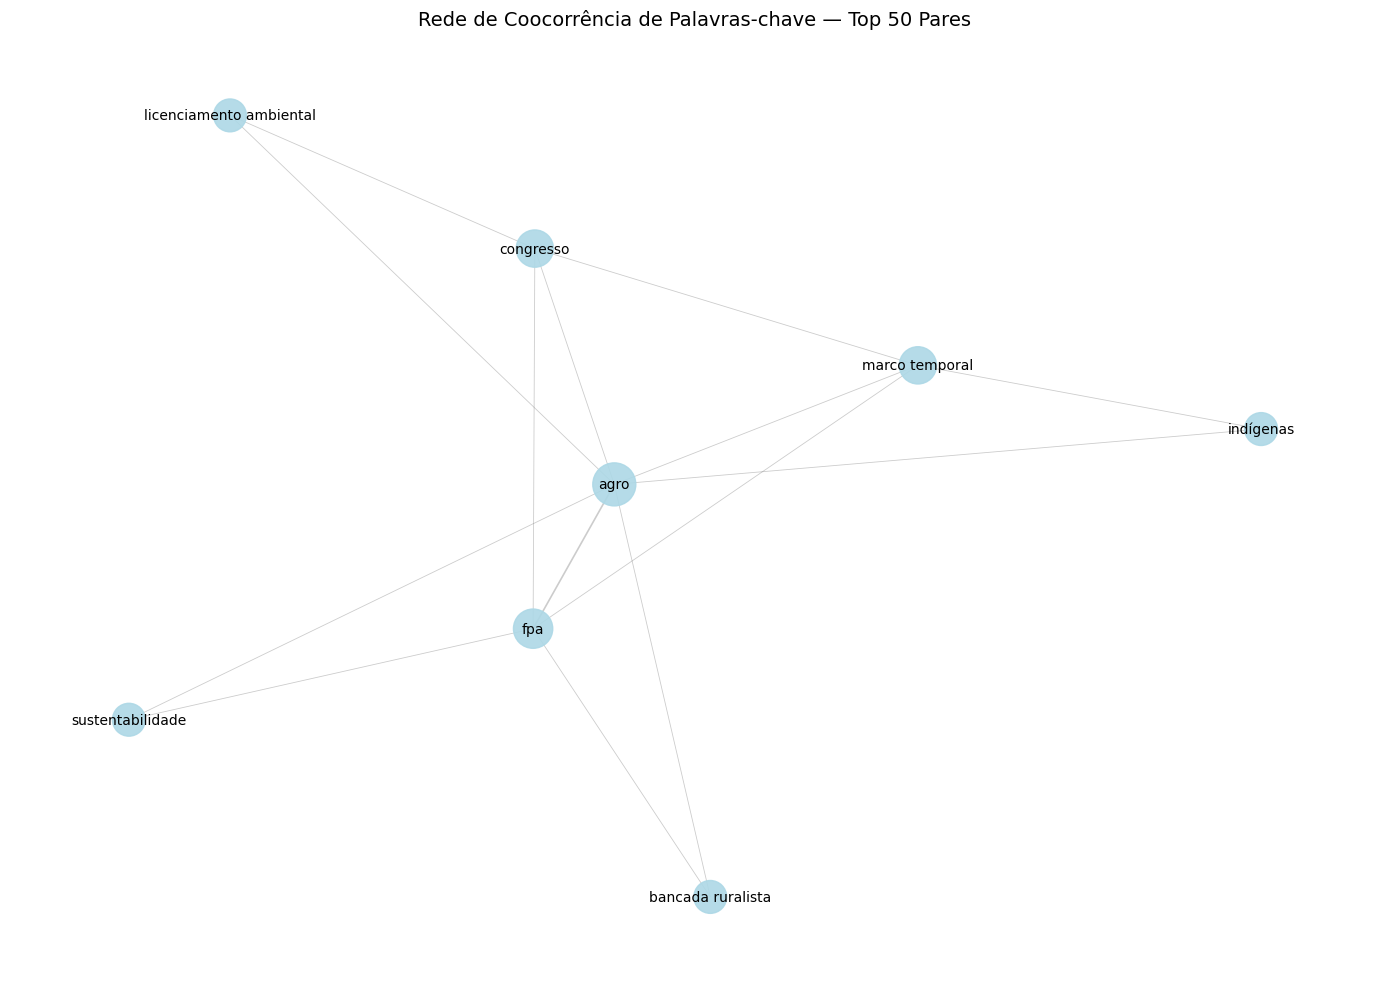

In [ ]:
from collections import Counter
from itertools import combinations
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd



# Extrair pares de coocorrência
pair_counter = Counter()
for keywords in df['keywords']:
    tags = [kw.strip().lower() for kw in str(keywords).split(',')]
    pairs = combinations(sorted(set(tags)), 2)
    pair_counter.update(pairs)

# Selecionar os 50 pares mais frequentes
top_pairs = pair_counter.most_common(50)

# Construir grafo
G = nx.Graph()
for (tag1, tag2), weight in top_pairs:
    G.add_edge(tag1, tag2, weight=weight)

# Visualização clean
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, k=0.7, seed=42)

weights = [G[u][v]['weight'] for u, v in G.edges()]
scaled_weights = [w * 0.6 for w in weights]  # suaviza as bordas
node_sizes = [400 + 80 * G.degree(n) for n in G.nodes()]

nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='lightblue', alpha=0.9)
nx.draw_networkx_edges(G, pos, width=scaled_weights, edge_color='gray', alpha=0.4)
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')

plt.title("Rede de Coocorrência de Palavras-chave — Top 50 Pares", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()


